<a href="https://colab.research.google.com/github/DINH20104022/2014022-Hung-Minh-Tran-Dinh/blob/main/nd_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
 %cd /content/drive/MyDrive/DOWLOAD/Money

/content/drive/MyDrive/DOWLOAD/Money


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/Money',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 9 images belonging to 9 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/Money',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 9 images belonging to 9 classes.


In [ ]:
training_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '2000': 3,
 '20000': 4,
 '200000': 5,
 '5000': 6,
 '50000': 7,
 '500000': 8}

In [ ]:
test_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '2000': 3,
 '20000': 4,
 '200000': 5,
 '5000': 6,
 '50000': 7,
 '500000': 8}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 19/100
1/1 [==============================] - 2s 2s/step - loss: 0.9119 - accuracy: 0.7778 - val_loss: 1.0525 - val_accuracy: 0.6667
Epoch 20/100
1/1 [==============================] - 2s 2s/step - loss: 1.1761 - accuracy: 0.5556 - val_loss: 0.8859 - val_accuracy: 0.4444
Epoch 21/100
1/1 [==============================] - 2s 2s/step - loss: 0.9009 - accuracy: 0.7778 - val_loss: 0.8243 - val_accuracy: 0.6667
Epoch 22/100
1/1 [==============================] - 2s 2s/step - loss: 0.9702 - accuracy: 0.6667 - val_loss: 0.8408 - val_accuracy: 0.5556
Epoch 23/100
1/1 [==============================] - 2s 2s/step - loss: 1.2821 - accuracy: 0.4444 - val_loss: 0.4527 - val_accuracy: 0.8889
Epoch 24/100
1/1 [==============================] - 2s 2s/step - loss: 1.0154 - accuracy: 0.5556 - val_loss: 0.7475 - val_accuracy: 0.7778
Epoch 25/100
1/1 [==============================] - 2s 2s/step - loss: 0.6960 - accuracy: 0.7778 - val_loss: 0.6355 - val_accuracy: 0.8889
Epoch 26/100
1/1 [=========

In [ ]:
model.save('tien VN.1')

In [ ]:
model_tien = load_model('tien VN.1')

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06842581927776337
Train Accuracy 1.0


1/1 [==============================] - 0s 94ms/step
Đây là tờ: 500k


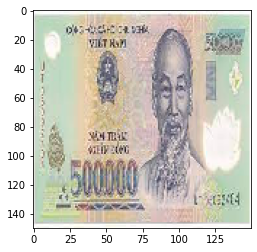

In [29]:
img = load_img('/content/500k.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['10K','200K','500k','100K','20K','50K']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])